In [1]:
import pandas as pd
import os
import numpy as np
import xgboost


In [2]:
os.chdir('C:\\RESEARCH\\LUAD\\Stage')

In [3]:
X=pd.read_excel('LUAD_Genes_Stage.xlsx',index_col=0)

In [4]:
X.shape

(517, 14807)

In [5]:
x=X.iloc[:,0:14805].values
y=X.iloc[:,-1].values

In [6]:
y

array(['Stage IV', 'Stage IB', 'Stage IIIA', 'Stage IB', 'Stage IIIA',
       'Stage IA', 'Stage IB', 'Stage IIIB', 'Stage IIIB', 'Stage IIB',
       'Stage IIIB', 'Stage IV', 'Stage IB', 'Stage IB', 'Stage IB',
       'Stage IIIB', 'Stage IB', 'Stage IIIA', 'Stage IB', 'Stage IB',
       'Stage IIB', 'Stage IV', 'Stage IB', 'Stage IIB', 'Stage IB',
       'Stage IIB', 'Stage IB', 'Stage IV', 'Stage IIIA', 'Stage IIB',
       'Stage IIB', 'Stage IIA', 'Stage IIIA', 'Stage IB', 'Stage IB',
       'Stage IA', 'Stage IA', 'Stage IIIA', 'Stage IB', 'Stage IB',
       'Stage IIA', 'Stage IIB', 'Stage IIB', 'Stage IB', 'Stage IB',
       'Stage IV', 'Stage IIIA', 'Stage IA', 'Stage IB', 'Stage IA',
       'Stage IB', 'Stage IB', 'Stage IIB', 'Stage IA', 'Stage IB',
       'Stage IIB', 'Stage IB', 'Stage IB', 'Stage IIIA', 'Stage IA',
       'Stage IA', 'Stage IA', 'Stage IB', 'Stage IIIA', 'Stage IB',
       'Stage IA', 'Stage IA', 'Stage IIB', 'Stage IA', 'Stage IA',
       'Stage IIIA', 'S

In [7]:
# Encoding categorical data
from sklearn.preprocessing import LabelEncoder
labelEncoder_y = LabelEncoder()
y = labelEncoder_y.fit_transform(y.astype(str))


In [8]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=0)


In [9]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_val = sc.fit_transform(X_val)
X_test = sc.transform(X_test)

In [10]:
# Fitting XGBoost to the Validation set
from xgboost import XGBClassifier
classifier = XGBClassifier()
classifier.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='multi:softprob', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1)

In [15]:

# Predicting the Validation set results
y_val_pred = classifier.predict(X_val)

In [16]:
# Making the Confusion Matrix
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_val, y_val_pred)
accuracy = ((cm[0][0]+cm[1][1]+cm[2][2]+cm[3][3]+cm[4][4]+cm[5][5]+cm[6][6]) / cm.sum())
accuracy

0.3373493975903614

Confusion Matrix, without normalization
[[ 0  1  0  0  0  0  0]
 [ 0  8 11  0  1  1  0]
 [ 0  0 18  0  2  1  0]
 [ 0  1  6  0  0  0  0]
 [ 0  1 12  0  2  0  0]
 [ 0  3  6  0  1  0  0]
 [ 0  2  5  0  1  0  0]]


<Figure size 720x504 with 0 Axes>

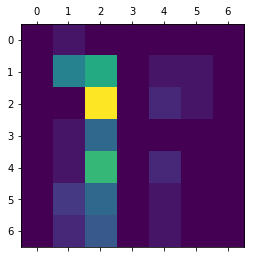

In [17]:
# np.set_printoptions(precision=2)
print('Confusion Matrix, without normalization')
print(cm)
plt.figure(figsize = (10,7))
plt.matshow(cm)


Normalized confusion matrix
[[0.         1.         0.         0.         0.         0.
  0.        ]
 [0.         0.38095238 0.52380952 0.         0.04761905 0.04761905
  0.        ]
 [0.         0.         0.85714286 0.         0.0952381  0.04761905
  0.        ]
 [0.         0.14285714 0.85714286 0.         0.         0.
  0.        ]
 [0.         0.06666667 0.8        0.         0.13333333 0.
  0.        ]
 [0.         0.3        0.6        0.         0.1        0.
  0.        ]
 [0.         0.25       0.625      0.         0.125      0.
  0.        ]]


<Figure size 432x288 with 0 Axes>

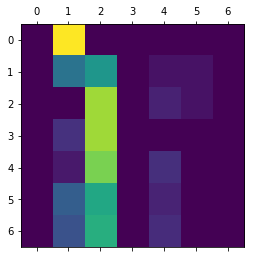

In [18]:
# Normalize the confusion matrix by row (i.e. by the number of samples in each class)
cm_normalized = cm.astype('float') / cm.sum(axis=1) [:, np.newaxis]
print('Normalized confusion matrix')
print(cm_normalized)
plt.figure()
plt.matshow(cm_normalized)

In [19]:
# Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_val, y_val_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.50      0.38      0.43        21
           2       0.31      0.86      0.46        21
           4       0.00      0.00      0.00         7
           5       0.29      0.13      0.18        15
           6       0.00      0.00      0.00        10
           8       0.00      0.00      0.00         8

   micro avg       0.34      0.34      0.34        83
   macro avg       0.16      0.20      0.15        83
weighted avg       0.26      0.34      0.26        83



C:\Users\Kanika Saini\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [20]:

# Matthews Correlation Coefficient Calculation #
from sklearn.metrics import matthews_corrcoef
matthews_corrcoef(y_val, y_val_pred)

0.15242355316246947

In [21]:
# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 5)
accuracies.mean()

C:\Users\Kanika Saini\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


0.3061058479248778

In [ ]:
"""
# Applying Grid Search to find the best model and the best parameters
from sklearn.model_selection import GridSearchCV
parameters = [{'C' : [1, 10, 100, 1000], 'kernel' : ['linear']},
              {'C' : [1, 10, 100, 1000], 'kernel' : ['rbf'], 'gamma' : [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008]}]
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters, 
                           scoring = 'accuracy',
                           cv = 10, 
                           n_jobs = -1)
grid_search = grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_"""

In [ ]:
################### Testing set ###########################

In [ ]:
# Fitting XGBoost to the Training set
from xgboost import XGBClassifier
classifier = XGBClassifier()
classifier.fit(X_train, y_train)

In [ ]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [ ]:
# Making the Confusion Matrix
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
accuracy = ((cm[0][0]+cm[1][1]) / cm.sum())

In [ ]:
# np.set_printoptions(precision=2)
print('Confusion Matrix, without normalization')
print(cm)
plt.figure(figsize = (10,7))
plt.matshow(cm)


In [ ]:
# Normalize the confusion matrix by row (i.e. by the number of samples in each class)
cm_normalized = cm.astype('float') / cm.sum(axis=1) [:, np.newaxis]
print('Normalized confusion matrix')
print(cm_normalized)
plt.figure()
plt.matshow(cm_normalized)

In [ ]:
# Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

In [ ]:

# Matthews Correlation Coefficient Calculation #
from sklearn.metrics import matthews_corrcoef
matthews_corrcoef(y_test, y_pred)


In [ ]:

# ROC Curve Implementation
import scikitplot as skplt
y_pred = classifier.predict(X_test)
preds = y_pred[:,]
fpr, tpr, threshold = skplt.metrics.roc_curve(y_test, preds)
roc_auc = skplt.metrics.auc(fpr, tpr)

In [ ]:
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
